<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/video_notebooks/03_pytorch_computer_vision_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Computer Vision

* See reference notebook - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/03_pytorch_computer_vision.ipynb 
* See reference online book - https://www.learnpytorch.io/03_pytorch_computer_vision/

## 0. Computer vision libraries in PyTorch

Before we get started writing code, let's talk about some PyTorch computer vision libraries you should be aware of.

| PyTorch module | What does it do? |
| ----- | ----- |
| [`torchvision`](https://pytorch.org/vision/stable/index.html) | Contains datasets, model architectures and image transformations often used for computer vision problems. |
| [`torchvision.datasets`](https://pytorch.org/vision/stable/datasets.html) | Here you'll find many example computer vision datasets for a range of problems from image classification, object detection, image captioning, video classification and more. It also contains [a series of base classes for making custom datasets](https://pytorch.org/vision/stable/datasets.html#base-classes-for-custom-datasets). |
| [`torchvision.models`](https://pytorch.org/vision/stable/models.html) | This module contains well-performing and commonly used computer vision model architectures implemented in PyTorch, you can use these with your own problems. | 
| [`torchvision.transforms`](https://pytorch.org/vision/stable/transforms.html) | Often images need to be transformed (turned into numbers/processed/augmented) before being used with a model, common image transformations are found here. | 
| [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) | Base dataset class for PyTorch.  | 
| [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html#module-torch.utils.data) | Creates a Python iterable over a dataset (created with `torch.utils.data.Dataset`). |

> **Note:** The `torch.utils.data.Dataset` and `torch.utils.data.DataLoader` classes aren't only for computer vision in PyTorch, they are capable of dealing with many different types of data.

Now we've covered some of the most important PyTorch computer vision libraries, let's import the relevant dependencies.


In [4]:
# Import pytorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor 

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check version
print(torch.__version__)
print(torchvision.__version__)

2.6.0+cu126
0.21.0+cu126


## 1. Getting a dataset

The dataset we'll be using is FashionMNIST from torchvision.datasets - https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html#torchvision.datasets.FashionMNIST 

*`torchvision.datasets` contains a lot of example datasets you can use to practice writing computer vision code on. **FashionMNIST** is one of those datasets. And since it has 10 different image classes (different types of clothing), it's a multi-class classification problem.*

To download it, we provide the following parameters:
* `root: str` - which folder do you want to download the data to?
* `train: Bool` - do you want the training or test split?
* `download: Bool` - should the data be downloaded?
* `transform: torchvision.transforms` - what transformations would you like to do on the data?
* `target_transform` - you can transform the targets (labels) if you like too.

Many other datasets in `torchvision` have these parameter options.

In [5]:
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root="data", # where to download data to?
    train=True, # do we want the training dataset?
    download=True, # do we want to download yes/no?
    transform=ToTensor(), # how do we want to transform the data?
    target_transform=None # How to transfer the labels/targets?
)
test_data = datasets.FashionMNIST(
    root="data", # where to download data to?
    train=False, # do we want the training dataset?
    download=True, # do we want to download yes/no?
    transform=ToTensor(), # how do we want to transform the data?
    target_transform=None # How to transfer the labels/targets?
)


In [6]:
len(train_data), len(test_data)

(60000, 10000)

In [7]:
# See the first training exampl
image, label = train_data[0]
image, label 

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [8]:
class_names= train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [9]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [10]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

### 1.1 Check input and output shapes of data

In [11]:
# Check the shape of the image
print(f"Image shape: {image.shape} -> [color_channels, height, width]")
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image label: Ankle boot


### 1.2 Visualizing our data

Image shape: torch.Size([1, 28, 28])


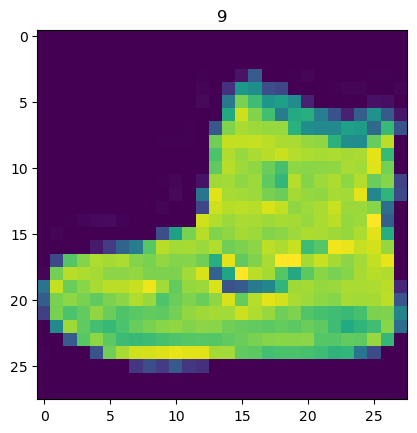

In [12]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze()) # squeeze remove the extra colorchannel dimension
plt.title(label);

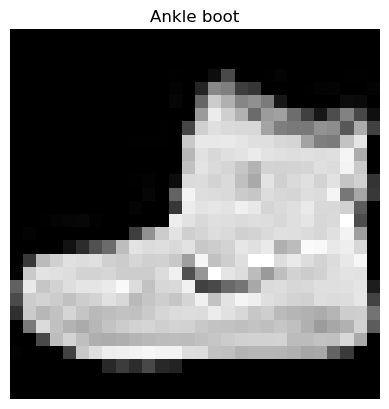

In [13]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);
plt.axis(False);

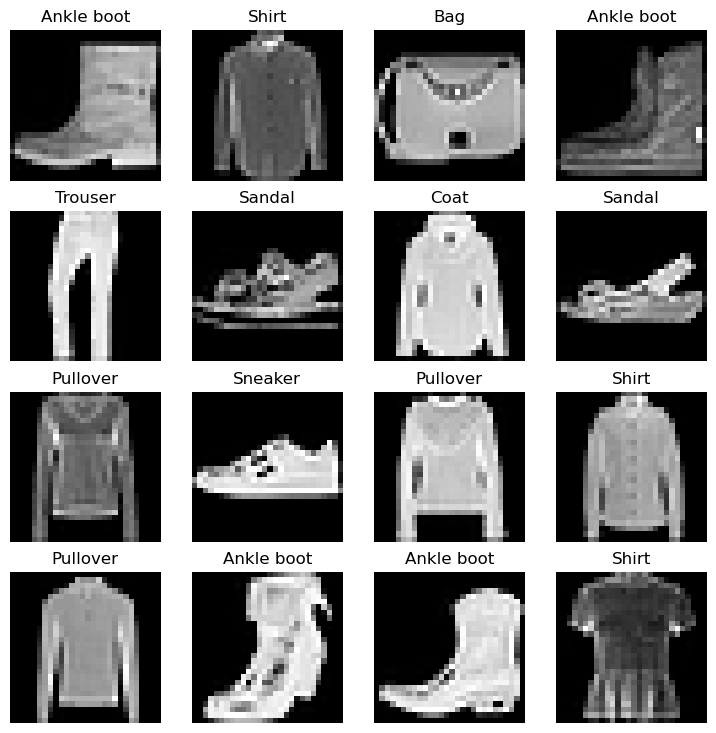

In [14]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

## 2. Prepare DataLoader

The next step is to prepare it with a [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) or `DataLoader` for short.
The `DataLoader` does what you think it might do.

It helps load data into a model.
For training and for inference.
It turns a large `Dataset` into a Python iterable of smaller chunks.
These smaller chunks are called **batches** or **mini-batches** and can be set by the `batch_size` parameter.

Why would we do this?

1. It is more computationally efficient, as in, your computing hardware may not be able to look (store in memory) at 60000 images in one hit. So we break it down to 32 images at a time (batch size of 32). 
2. It gives our neural network more chances to update its gradients per epoch.

For more on mini-batches, see here: https://youtu.be/l4lSUAcvHFs

In [15]:
# How does our data looks like ?
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [16]:
from torch.utils.data import DataLoader

# Set up the batch size hyperparamter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                            shuffle=True)


test_dataloader = DataLoader(dataset=test_data,
                            batch_size=BATCH_SIZE,
                            shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x26d1ab7b850>,
 <torch.utils.data.dataloader.DataLoader at 0x26d1ab7bdc0>)

In [17]:
# Let's check out what what we've created
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}") # 60000/32
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}") # 10000/32

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x0000026D1AB7B850>, <torch.utils.data.dataloader.DataLoader object at 0x0000026D1AB7BDC0>)
Length of train_dataloader: 1875 batches of 32
Length of test_dataloader: 313 batches of 32


In [18]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 8, Label size: torch.Size([])


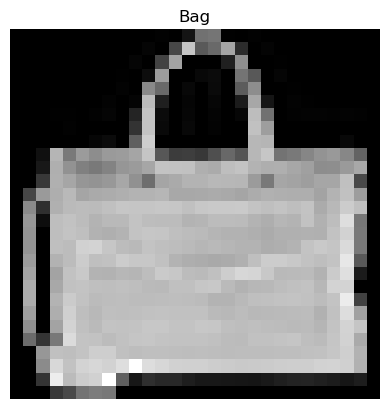

In [19]:
# Show a sample
# torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, Label size: {label.shape}")

In [20]:
train_data.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

## 3. Model 0: Build a basline model

When starting to build a series of machine learning modelling experiments, **it's best practice to start with a baseline model.**

A baseline model is a simple model you will try and improve upon with subsequent models/experiments.

In other words: start simply and add complexity when necessary.

In [21]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]
# x.shape

# Flatten the sampel
output = flatten_model(x) # perfrom the forward pass

print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")
output
output.squeeze() # Remove the extra dimension

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0039, 0.0039, 0.0000, 0.0000, 0.0078, 0.0078,
        0.0000, 0.0000, 0.0039, 0.0078, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.2863, 0.0000, 0.0000, 0.0078, 

In [22]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # compress the image into a single vector
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape)
        )
        
    def forward(self, x):
        return self.layer_stack(x)


In [23]:
len(class_names)

10

In [24]:
torch.manual_seed(42)

# Setup model with input parameters    
model_0 = FashionMNISTModelV0(input_shape=784, # 28 *28
                              hidden_units=10, 
                              output_shape=len(class_names)# 10 
                              ).to("cpu")
model_0 

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [25]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x) # 10 class outputs

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

### 3.1 Setup loss, optimizer and evaluation metrics

* Loss function - since we're working with multi-class data, our loss function will be `nn.CrossEntropyLoss()`
* Optimizer - our optimizer `torch.optim.SGD()` (stochastic gradient descent)
* Evaluation metric - since we're working on a classification problem, let's use accruacy as our evaluation metric

In [26]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download...")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download...


In [27]:
# Import accuracy metric
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

### 3.2 Creating a function to time our experiments
Machine learning is very experimental.
Two of the main things you'll often want to track are:
1. Model's performance (loss and accuracy values etc)
2. How fast it runs 

In [28]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
    """Print the difference betweem start and end time"""
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time
start_time = timer() # start time
# some code ...
end_time= timer() # start time
print_train_time(start_time, end_time, device="cpu")

Train time on cpu: 0.000 seconds


2.27999998969608e-05

### 3.3 Creating a training loop and training a model on batches of data

1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss *per batch*.
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*.
4. Print out what's happening.
5. Time it all (for fun).

**Note:** Because we are computing on *batches*, the optimizer will update the model's parameters once *per batch* rather than once per epoch.

In [29]:
# Import tqdm for progress bard
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training time)
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-----")
    ### Training
    train_loss = 0
    # Add a loop to loop through the training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()
        # Forward pass
        y_pred = model_0(X)
        # Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulate train loss
        # Optimizer zero grad
        optimizer.zero_grad()
        # Loss backwards
        loss.backward()
        # Optimizer step (update the model's parameters once *per batch*)
        optimizer.step()
        
        # Print out what's happening
        if batch % 400 == 0:
            print(f"Run through {batch*len(X)}/{len(train_dataloader.dataset)} samples")
            
    # Divide total train loss by lenght of train dataloader
    train_loss /= len(train_dataloader) # to average it accross batches per epochs
            
    
    ### Testing
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader: # no need to keep track of patches
            # Forward pass
            test_pred = model_0(X_test)
            # Calculate the loss (accumulatively)
            test_loss += loss_fn(test_pred, y_test)
            # Calculate accuracy
            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1)) 
        
        # Calculate the test loss average per batch
        test_loss /= len(test_dataloader)
        # Calculate the test accuracy average per batch
        test_acc /= len(test_dataloader)
    # Print what's happening
    print(f"\nTrain loss: {train_loss:.4f} - Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device)) # checking where the model parameters

c:\Users\ebrah\anaconda3\envs\dl-venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Run through 0/60000 samples
Run through 12800/60000 samples
Run through 25600/60000 samples
Run through 38400/60000 samples
Run through 51200/60000 samples


 33%|███▎      | 1/3 [00:09<00:18,  9.40s/it]


Train loss: 0.5904 - Test loss: 0.5095, Test acc: 82.0387
Epoch: 1
-----
Run through 0/60000 samples
Run through 12800/60000 samples
Run through 25600/60000 samples
Run through 38400/60000 samples
Run through 51200/60000 samples


 67%|██████▋   | 2/3 [00:19<00:09,  9.86s/it]


Train loss: 0.4763 - Test loss: 0.4799, Test acc: 83.1969
Epoch: 2
-----
Run through 0/60000 samples
Run through 12800/60000 samples
Run through 25600/60000 samples
Run through 38400/60000 samples
Run through 51200/60000 samples


100%|██████████| 3/3 [00:29<00:00,  9.71s/it]


Train loss: 0.4550 - Test loss: 0.4766, Test acc: 83.4265
Train time on cpu: 29.145 seconds


In [30]:
# checking where the model parameters
str(next(model_0.parameters()).device)

'cpu'

## 4. Make predictions and get Model 0 results


In [31]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    """Return a dictionary containig the results of model predicting on data_loader."""
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            # Make predictions
            y_pred = model(X)
            
            # Accumulate the loss and acc values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                               y_pred=y_pred.argmax(dim=1))
        
        # Scale loss and acc to find the average loss/acc per batch
        loss /=len(data_loader)
        acc /=len(data_loader)
        
        return{"model_name": model.__class__.__name__, # only works when model was created with a class
               "model_loss": loss.item(),
               "model_acc":acc}
        
# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_0_results

100%|██████████| 313/313 [00:01<00:00, 239.35it/s]


{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## 5. Setup device agnostic-code (for using a GPU if there is one)




In [32]:
!nvidia-smi

Wed Apr  9 14:05:00 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 572.83                 Driver Version: 572.83         CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3050 ...  WDDM  |   00000000:01:00.0  On |                  N/A |
| N/A   47C    P8              7W /   60W |    1029MiB /   4096MiB |     19%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [33]:
torch.cuda.is_available()

True

In [34]:
# Setup device-agnostic code
import torch 
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 6. Model 1: Building a better model with non-linearity 


In [35]:
# Create a model with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
    def __init__(self, 
                 input_shape: int,
                 hiddden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # Flatten inputs into a single vector
            nn.Linear(in_features=input_shape,
                      out_features=hiddden_units),
            nn.ReLU(),
            nn.Linear(in_features=hiddden_units,
                      out_features=output_shape),
            nn.ReLU()
        )
    
    def forward(self, x):
        return self.layer_stack(x) 

In [36]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784,
                              hiddden_units=10,
                              output_shape=len(class_names)).to(device)

print(next(model_1.parameters()).device) , model_1


cuda:0


(None,
 FashionMNISTModelV1(
   (layer_stack): Sequential(
     (0): Flatten(start_dim=1, end_dim=-1)
     (1): Linear(in_features=784, out_features=10, bias=True)
     (2): ReLU()
     (3): Linear(in_features=10, out_features=10, bias=True)
     (4): ReLU()
   )
 ))

### 6.1 Setup loss, optimizer and evaluation metrics


In [37]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss() # Measures how wrong th model is
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

### 6.2 Functionizing training and evaluation/testing loops 

Let's create a function for:
* training loop - `train_step()`
* testing loop - `test_step()`

In [38]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    """Performs a training with a model trying to learn on data_dataloader"""
    
    train_loss, train_acc = 0, 0
    # Put model into training mode
    model.train()
    
    # Add a loop to loop through the training batches
    for batch, (X, y) in enumerate(data_loader):
        # Put data on target device 
        X, y = X.to(device), y.to(device)
        
        # Forward pass (outputs the raw logits from the model)
        y_pred = model(X)
        
        # Calculate the loss
        loss = loss_fn(y_pred, y)
        train_loss += loss # Accumulate train loss
        train_acc += accuracy_fn(y_true=y,
                                y_pred=y_pred.argmax(dim=1)) # go from logits -> prediction labels
        
        # 3. Optimizer zero grad
        optimizer.zero_grad()
        
        # 4. Loss backward
        loss.backward()
        
        # 5. Optimizer step (update the model's parameters once *per batch*)
        optimizer.step()
    # Divide total train loss and acc by length of train dataloader
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train Loss: {train_loss:.5f} - Train acc: {train_acc:.2f}%")
        

In [39]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    """Performs a testing loop step on model going over data_loader."""
    test_loss, test_acc = 0, 0
    
    # Put the model in eval mode
    model_0.eval()
    
    # Turn on inference model context manager
    with torch.inference_mode():
        for X, y in data_loader: # no need to keep track of patches
            # Put data on target device 
            X, y = X.to(device), y.to(device)
            # Forward pass (Outputs raw logits)
            test_pred = model(X) 
            # Calculate the loss (accumulatively)
            test_loss += loss_fn(test_pred, y)
            # Calculate accuracy
            test_acc += accuracy_fn(y_true=y,
                                    y_pred=test_pred.argmax(dim=1)) 
        
        # Calculate the test loss average per batch
        test_loss /= len(data_loader)
        # Calculate the test accuracy average per batch
        test_acc /= len(data_loader)
        print(f"Test Loss: {test_loss:.5f} - Test acc: {test_acc:.2f}%")

In [40]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

# Set Epochs
epochs = 3

# Create an optimization and evaluation loop 
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    train_step(model=model_1,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    test_step(model=model_1,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)
    
train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(train_time_start_on_gpu,
                                            train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Train Loss: 1.42179 - Train acc: 54.29%


 33%|███▎      | 1/3 [00:11<00:23, 11.81s/it]

Test Loss: 1.12168 - Test acc: 62.15%
Epoch: 1
-------
Train Loss: 1.03359 - Train acc: 64.61%


 67%|██████▋   | 2/3 [00:24<00:12, 12.17s/it]

Test Loss: 1.00019 - Test acc: 64.48%
Epoch: 2
-------
Train Loss: 0.95996 - Train acc: 66.05%


100%|██████████| 3/3 [00:37<00:00, 12.34s/it]

Test Loss: 0.96338 - Test acc: 65.41%
Train time on cuda: 37.032 seconds


> **Note:** Sometimes, depending on your data/hardware you might find that your model trains faster on CPU than GPU.
> 
> Why is this?
>
> 1. It could be that the overhead for copying data/model to and from the GPU outweighs the compute benefits offered by the GPU.
> 2. The hardware you're using has a better CPU in terms compute capability than the GPU.
>
> For more on how to make your models compute faster, see here: https://horace.io/brrr_intro.html

In [41]:
total_train_time_model_1

37.03179779999982

In [42]:
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)

  0%|          | 0/313 [00:00<?, ?it/s]


RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)

In [45]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
    """Return a dictionary containig the results of model predicting on data_loader."""
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            # Put data into device
            X, y = X.to(device), y.to(device)
            # Make predictions
            y_pred = model(X)
            
            # Accumulate the loss and acc values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                               y_pred=y_pred.argmax(dim=1))
        
        # Scale loss and acc to find the average loss/acc per batch
        loss /=len(data_loader)
        acc /=len(data_loader)
        
        return{"model_name": model.__class__.__name__, # only works when model was created with a class
               "model_loss": loss.item(),
               "model_acc":acc}

In [46]:
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_1_results

100%|██████████| 313/313 [00:01<00:00, 192.14it/s]


{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.963383674621582,
 'model_acc': 65.40535143769968}

In [47]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## Model 2: Building a Convolutional Neural Network (CNN)

CNN's are also known ConvNets.

CNN's are known for their capabilities to find patterns in visual data.

To find out what's happening inside a CNN, see this website: https://poloclub.github.io/cnn-explainer/

In [104]:
from torch import nn
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture that replicates the TinyVGG
    model from CNN explainer website.
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()  
        self.conv_block1 = nn.Sequential(
            # Create a conv layer - https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1), # values we can set ourselves in our NN's are called hyperparameters
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
            )
        self.conv_block2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1), # values we can set ourselves in our NN's are called hyperparameters
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
            )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7, # the trick to calculate this is to pass a it to a random tensor with the same size as the input data and see what the output shape looks like
                      out_features=output_shape)
        )
    
    def forward(self, x):
        x = self.conv_block1(x)
        # print(f"Output shape of conv_block_1: {x.shape}")
        x = self.conv_block2(x) 
        # print(f"Output shape of conv_block_2: {x.shape}") # torch.Size([1, 10, 7, 7])
        x = self.classifier(x)
        # print(f"Output shape of classifier: {x.shape}")
        return x

In [105]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1, # number of color channels
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)



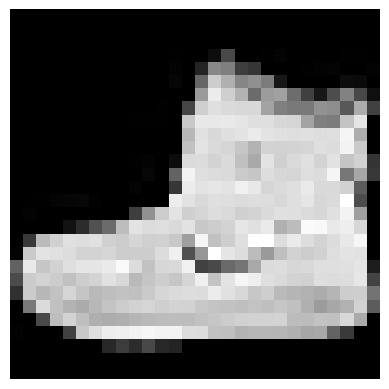

In [ ]:
plt.imshow(image.squeeze(), cmap="grey")
plt.axis(False);

In [95]:
# Pass image through model
model_2(image.unsqueeze(0).to(device))

Output shape of conv_block_1: torch.Size([1, 10, 14, 14])
Output shape of conv_block_2: torch.Size([1, 10, 7, 7])
Output shape of classifier: torch.Size([1, 10])


tensor([[ 0.0246, -0.0644,  0.0551, -0.0360, -0.0139,  0.0113, -0.0014, -0.0075,
          0.0213,  0.0076]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [98]:
# Try the model on a random tensor wit a s imilar shape like our image
rand_image_tensor = torch.randn(size=(1, 28, 28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [101]:
# Pass image through model
model_2(rand_image_tensor.unsqueeze(0).to(device))

Output shape of conv_block_1: torch.Size([1, 10, 14, 14])
Output shape of conv_block_2: torch.Size([1, 10, 7, 7])
Output shape of classifier: torch.Size([1, 10])


tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], device='cuda:0', grad_fn=<AddmmBackward0>)

### 7.1 Stepping through `nn.Conv2d()`

See the documentation for `nn.Conv2d()` here - https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html 


In [52]:
torch.manual_seed(42)

# Creat a batch of images
images = torch.randn(size=(32, 3, 64 ,64))
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image:\n {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0

In [67]:
# Create  a signle conv2d layer
torch.manual_seed(42)

conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3, # the same as (3, 3)
                       stride=1,
                       padding=0)

# pass the data through the convolutional layer
conv_output = conv_layer(test_image.unsqueeze(0))
conv_output.shape

torch.Size([1, 10, 62, 62])

In [63]:
test_image.shape

torch.Size([3, 64, 64])

In [64]:
test_image.unsqueeze(0).shape

torch.Size([1, 3, 64, 64])

### 7.2 Stepping through `nn.MaxPool2d()`

https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html


In [68]:
test_image.shape

torch.Size([3, 64, 64])

In [71]:
# Print out original image shape without unsqueezed dimension
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(0).shape}")

# Create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass the data through just the conv layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass data through the max pool layer
test_image_through_conv_and_max = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([1, 10, 31, 31])


In [75]:
torch.manual_seed(42)
# Create a random tesnor with a similar number of dimensions to our images
random_tensor = torch.randn(size=(1, 1, 2, 2))
print(f"\nRandom Tensor:\n{random_tensor}")
print(f"Random Tensor Shape: {random_tensor.shape}")
print("#" *5)
# Create a max pool leayer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass the random tensor through the max_pool_layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"Max pool Tensor:\n{max_pool_tensor}")
print(f"Max pool tensor Shape: {max_pool_tensor.shape}")


Random Tensor:
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random Tensor Shape: torch.Size([1, 1, 2, 2])
#####
Max pool Tensor:
tensor([[[[0.3367]]]])
Max pool tensor Shape: torch.Size([1, 1, 1, 1])


### 7.3 Setup a loss function and optimizer for `model_2`

In [106]:
# Setup loss function/eval metrics/optimizer
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

### 7.4 Training and testing `model_2` using our training and test functions

In [107]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer() 

# Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_2,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                            end=train_time_end_model_2,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Train Loss: 0.60472 - Train acc: 78.18%


 33%|███▎      | 1/3 [00:15<00:30, 15.08s/it]

Test Loss: 0.39510 - Test acc: 86.07%
Epoch: 1
-------
Train Loss: 0.35881 - Train acc: 87.18%


 67%|██████▋   | 2/3 [00:29<00:14, 14.81s/it]

Test Loss: 0.35910 - Test acc: 86.91%
Epoch: 2
-------
Train Loss: 0.32301 - Train acc: 88.37%


100%|██████████| 3/3 [00:44<00:00, 14.78s/it]

Test Loss: 0.32112 - Test acc: 88.50%
Train time on cuda: 44.330 seconds


In [108]:
# Get model_2 results
model_2_results = eval_model(
     model=model_2,
     data_loader=test_dataloader,
     loss_fn=loss_fn,
     accuracy_fn=accuracy_fn,
     device=device
)

model_2_results

100%|██████████| 313/313 [00:01<00:00, 169.77it/s]


{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32111915946006775,
 'model_acc': 88.49840255591054}

## 8. Compare model results and training time 

In [109]:
import pandas as pd
compare_results=  pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.963384,65.405351
2,FashionMNISTModelV2,0.321119,88.498403


In [112]:
# Add training time to results comparison
compare_results["traininig_time"]  = [total_train_time_model_0,
                                      total_train_time_model_1,
                                      total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,traininig_time
0,FashionMNISTModelV0,0.476639,83.426518,29.145400
1,FashionMNISTModelV1,0.963384,65.405351,37.031798
2,FashionMNISTModelV2,0.321119,88.498403,44.330445


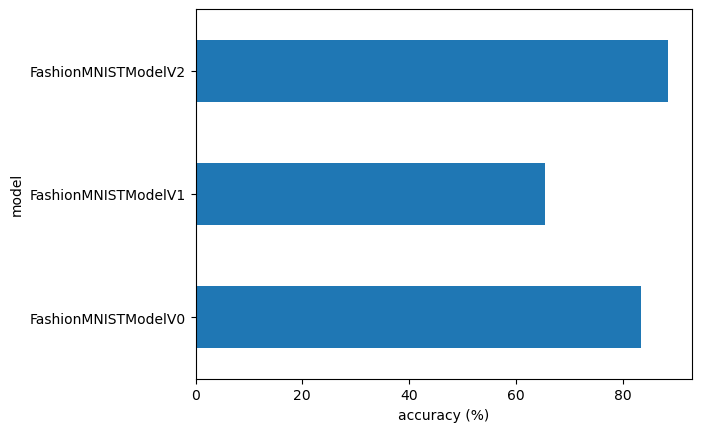

In [113]:
# Visualize our model result
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model");

## 9. Make and evaluate random predictions with best model

In [114]:
def make_predicitions(model: torch.nn.Module,
                      data: list,
                      device: torch.device = device):
    pred_probs = []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare the sample (add a batch dimension and pass to target device)
            sample = torch.unsqueeze(sample, dim=0).to(device)
            # Forward pass (model output raw logits)
            pred_logit = model(sample)   
            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
            # Get pred_prob off the GPU for further calculations
            pred_probs.append(pred_prob.cpu())
            
        # Stack the pred_probs to turn list into a tensor
        return torch.stack(pred_probs)
    

In [134]:
import random
# random.seed(42)
test_samples = [] 
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

# View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Ankle boot')

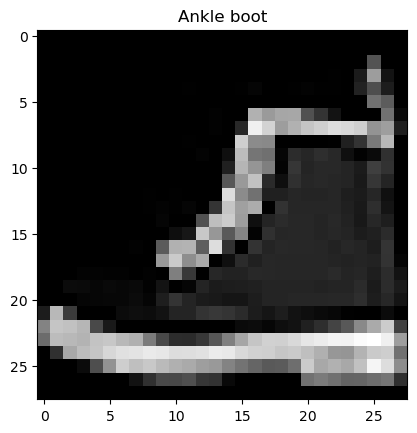

In [137]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

In [138]:
# Make predictions
pred_probs = make_predicitions(model=model_2,
                               data=test_samples)

# View first two prediction probabilities
pred_probs[:2]

tensor([[1.5928e-06, 1.3002e-06, 2.8504e-06, 2.5402e-05, 9.2956e-06, 1.4574e-03,
         3.7974e-06, 9.3600e-04, 2.5033e-03, 9.9506e-01],
        [5.7155e-05, 8.1934e-07, 3.3125e-05, 3.3917e-05, 7.9102e-06, 7.1426e-03,
         1.4042e-05, 9.2068e-01, 2.6991e-03, 6.9329e-02]])

In [139]:
# Convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([9, 7, 2, 0, 1, 0, 3, 5, 4])

In [140]:
test_labels

[9, 7, 2, 0, 1, 0, 4, 5, 4]

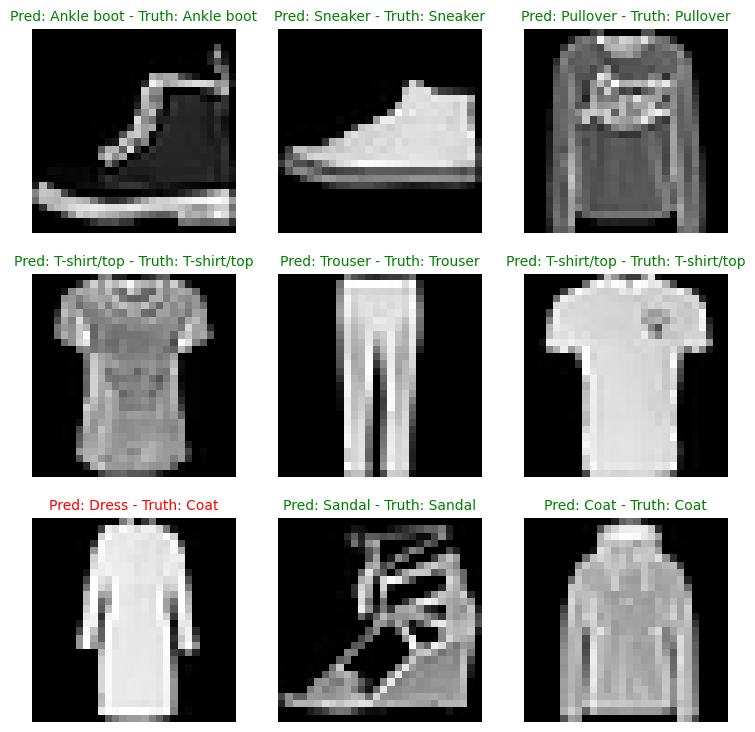

In [141]:
# Plot predictions
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
    # Create subplot
    plt.subplot(nrows, ncols, i+1)
    
    # Plot the target image
    plt.imshow(sample.squeeze(), cmap="gray")
    
    # Find the prediction 
    pred_label = class_names[pred_classes[i]]
    
    # Get the truth label (in text form)
    truth_label = class_names[test_labels[i]]
    
    # Creat a title for the plot
    title_text = f"Pred: {pred_label} - Truth: {truth_label}"
    
    # Check for equality between pred and truth and change color of title text
    if pred_label == truth_label :
        plt.title(title_text, fontsize=10, c="g") # green text if prediction same as truth
    else:
        plt.title(title_text, fontsize=10, c="r") 
  
    plt.axis(False);

## 10. Making a confusion matrix for further prediction evaluation 

A confusion matrix is a fantastic way of evaluating your classification models visually: https://www.learnpytorch.io/02_pytorch_classification/#9-more-classification-evaluation-metrics

1. Make predictions with our trained model on the test dataset
2. Make a confusion matrix `torchmetrics.ConfusionMatrix` - https://torchmetrics.readthedocs.io/en/stable/classification/confusion_matrix.html
3. Plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()` - http://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/ 

In [143]:
from tqdm.auto import tqdm

def make_predicitons(model: torch.nn.modules,
                     dataloader: torch.utils.data.DataLoader,
                     device: torch.device = device):
    # Make predictions with trained model
    y_preds = []
    model_2.eval()
    with torch.inference_mode():
        for X, y in tqdm(dataloader, desc="Making predictions... "):
            # Send the data and targets to target device
            X, y = X.to(device), y.to(device)
            # Forward pass
            y_logits = model(X)
            # Turn predictions from logits -> predictions probabilities -> prediction labels
            y_pred = torch.softmax(y_logits.squeeze(), dim=0).argmax(dim=1)
            # Put predcition on cpu for evaluation 
            y_preds.append(y_pred.cpu())
    return y_preds

In [144]:
y_preds = make_predicitons(model=model_2,
                           dataloader=test_dataloader)

Making predictions... : 100%|██████████| 313/313 [00:01<00:00, 165.74it/s]


In [146]:
# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor

tensor([9, 2, 1,  ..., 8, 1, 2])

In [ ]:
len(y_pred_tensor) 

(10000, 313)

In [149]:
# See if required packages are installed and if not, install them...
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1] >= 19, "mlxtend version should be 0.19.0 or higher")
except:
  !pip install torchmetrics -U mlxtend 
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

   ---------------------------------------- 0.0/961.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/961.5 kB ? eta -:--:--
   ---------------------------------------- 961.5/961.5 kB 5.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 11.6 MB/s eta 0:00:00
  Attempting uninstall: torchmetrics
    Found existing installation: torchmetrics 1.4.0.post0
    Uninstalling torchmetrics-1.4.0.post0:
      Successfully uninstalled torchmetrics-1.4.0.post0
mlxtend version: 0.23.4


In [150]:
import mlxtend
print(mlxtend.__version__)

0.23.4


In [152]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [153]:
y_pred_tensor[:10], test_data.targets

(tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7]), tensor([9, 2, 1,  ..., 8, 1, 5]))

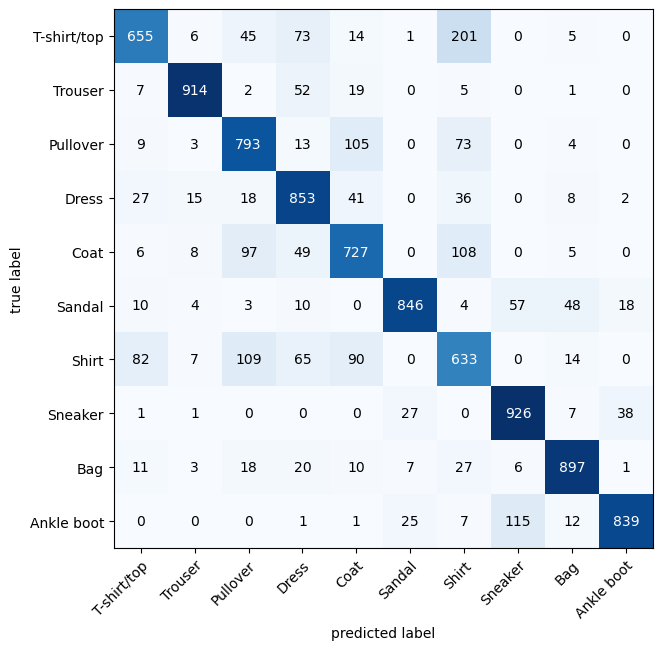

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task="multiclass")
confmat_tensor = confmat(preds=y_pred_tensor, 
                         target=test_data.targets) # targets == lables

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),# matplotlib likes working with numpy
    class_names=class_names,
    figsize=(10,7)
)

## 11. Save and load best performing model

In [176]:
from pathlib import Path

# Create model directory (if it doesn't already exist)
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, # create parent directories if needed
                 exist_ok=True) # if model dir already exist don't error

# Creat model save path
MODEL__NAME = "E_pytorch_course_computer_vision_model.pth"
MODEL_SAVE_PATH =  MODEL_PATH / MODEL__NAME

# Save the model stat_dict
print(f"Save model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(), # only saving the state_dict() only saves the learned parameters
           f=MODEL_SAVE_PATH) 

Save model to: models\E_pytorch_course_computer_vision_model.pth


In [177]:
# Create a new instance of FashionMNISTModelV2 (the same class as our saved state_dict())
# Note: loading model will error if the shapes here aren't the same as the saved version
loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units=10, #try changing this to 128 and seeing what happens 
                                     output_shape=len(class_names))
# Load in the saved state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send model to GPU
loaded_model_2 = loaded_model_2.to(device)


In [178]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn, 
    accuracy_fn=accuracy_fn
)

loaded_model_2_results

100%|██████████| 313/313 [00:01<00:00, 157.52it/s]


{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32111915946006775,
 'model_acc': 88.49840255591054}

In [179]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32111915946006775,
 'model_acc': 88.49840255591054}


We can find out if two tensors are close to each other using torch.isclose() and passing in a tolerance level of closeness via the parameters atol (absolute tolerance) and rtol (relative tolerance).

If our model's results are close, the output of torch.isclose() should be true.

In [180]:
# Check to see if results are close to each other (if they are very far away, there may be an error)
torch.isclose(torch.tensor(model_2_results["model_loss"]), 
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-08, # absolute tolerance
              rtol=0.0001) # relative tolerance

tensor(True)

## Exercises

* See here for exercises and extra-curriculum: https://www.learnpytorch.io/03_pytorch_computer_vision/#exercises 
